In [1]:
# Cell 1: Import Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
from wordcloud import WordCloud # pip install wordcloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # For basic sentiment
import nltk
from nltk.util import ngrams
# Ensure NLTK resources are available (should be from Phase 3)
# nltk.download('punkt') # Usually already done
# nltk.download('punkt_tab') # Usually already done

# Set plotting styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

print("EDA Libraries imported successfully.")

EDA Libraries imported successfully.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Cell 2: Load Cleaned Data
# Assuming you saved it as 'cleaned_reviews_data.csv' in the previous phase
data_file = 'cleaned_reviews_data.csv'

try:
    df = pd.read_csv(data_file)
    print(f"Data loaded successfully from '{data_file}'.")
    print(f"DataFrame shape: {df.shape}")
    print("\n--- First 5 Rows ---")
    print(df.head())
    print("\n--- DataFrame Info ---")
    print(df.info())
except FileNotFoundError:
    print(f"Error: File '{data_file}' not found. Please ensure Phase 3 was completed and the file was saved.")
except Exception as e:
     print(f"An error occurred while loading the data: {e}")

Data loaded successfully from 'cleaned_reviews_data.csv'.
DataFrame shape: (1500, 15)

--- First 5 Rows ---
   ReviewID     AppName                     PlayStoreReviewID       UserName  \
0         1  AliExpress  2cf4e22e-e7e5-46df-acff-cd77eaf9de9d  Blaise Hytrek   
1         2  AliExpress  da753698-5370-40b4-808b-eb0a3ce149a0   David Campos   
2         3  AliExpress  b769d4ac-1b9b-4a3d-b399-04abc34aaeb0      Lee Davis   
3         4  AliExpress  e849cdda-2ff9-4fac-b531-40b021d504ec      Jing Wang   
4         5  AliExpress  d8989ff9-2a7e-406b-8dfd-faf8bd48c884   Kari Eilrich   

                                        UserImageURL  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                          ReviewText  Rating  ThumbsUpCoun

# Analysis 1: Review Count Analysis 

### In this section, we will examine the volume of reviews collected for each of the three e-commerce applications (AliExpress, Alibaba, Jiji). Understanding the quantity of feedback available for each app is a fundamental first step. It provides context for the subsequent analyses (e.g., are comparisons between apps fair if one has significantly more reviews?) and can itself reveal interesting patterns. 

### We will perform two main checks: 

###    Total Reviews per App: We will count the total number of reviews retrieved for each application. This gives a snapshot of the overall feedback volume.
###    Reviews Over Time: We will analyze how the number of reviews has accumulated over time (monthly and yearly trends). This can help identify periods of high or low user engagement, potential impacts of major events (like app updates or sales), or simply the growth trajectory of user feedback for each app.
     

### The results will be presented using both numerical summaries (counts) and visualizations (bar charts for totals, line charts for trends

--- Review Count Analysis ---
Total Reviews per App:
AppName
AliExpress    500
Alibaba       500
Jiji          500
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_18796\960968773.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')


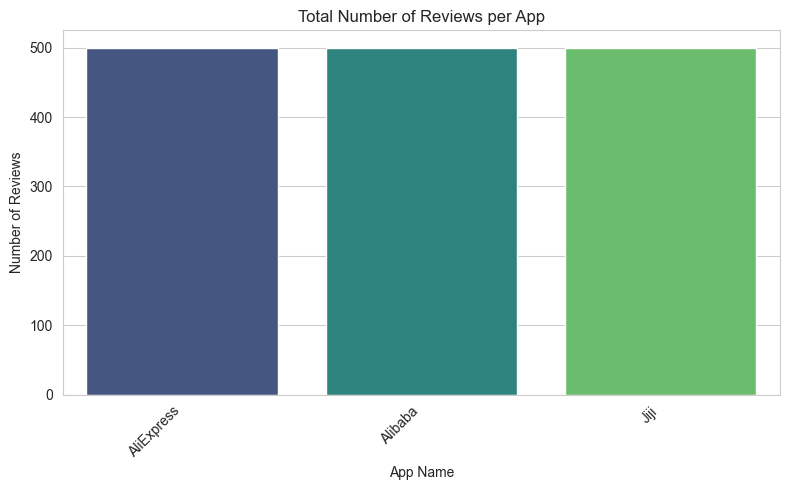

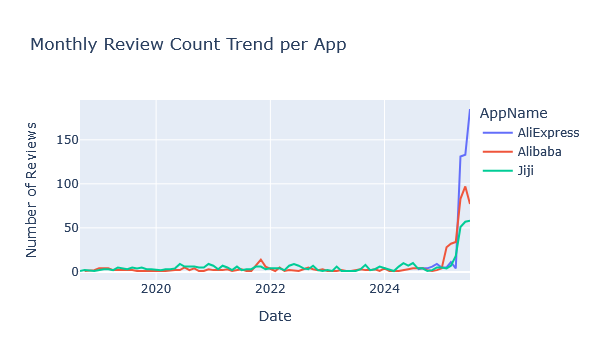


Yearly Review Counts:
AppName  AliExpress  Alibaba   Jiji
Year                               
2018            0.0      3.0    4.0
2019            0.0     16.0   40.0
2020            0.0     22.0   58.0
2021            0.0     35.0   53.0
2022            0.0     23.0   54.0
2023            0.0     19.0   35.0
2024           26.0     27.0   56.0
2025          474.0    355.0  200.0


In [5]:
# Cell 3: Review Count Analysis
print("--- Review Count Analysis ---")

# 1. Total Reviews per App
review_counts = df['AppName'].value_counts().sort_index() # Sort by App Name for consistency
print("Total Reviews per App:")
print(review_counts)

# Bar chart for total reviews
plt.figure(figsize=(8, 5))
sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')
plt.title('Total Number of Reviews per App')
plt.xlabel('App Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Reviews Over Time (Monthly Trend)
# Ensure ReviewDate is datetime
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])

# Extract Year-Month for grouping
df['YearMonth'] = df['ReviewDate'].dt.to_period('M')

# Group by App and YearMonth
reviews_over_time = df.groupby(['AppName', 'YearMonth']).size().reset_index(name='ReviewCount')
# Convert YearMonth back to datetime for plotting
reviews_over_time['YearMonth'] = reviews_over_time['YearMonth'].dt.to_timestamp()

# Plotting
fig = px.line(reviews_over_time, x='YearMonth', y='ReviewCount', color='AppName',
              title='Monthly Review Count Trend per App')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Reviews')
fig.show() # This will open in your browser or inline if configured

# Optional: Yearly Trend
df['Year'] = df['ReviewDate'].dt.year
yearly_reviews = df.groupby(['AppName', 'Year']).size().reset_index(name='ReviewCount')
print("\nYearly Review Counts:")
print(yearly_reviews.pivot(index='Year', columns='AppName', values='ReviewCount').fillna(0))

### Interpretation of Review Count Analysis 

This analysis provides a foundational understanding of the volume and temporal distribution of user feedback for AliExpress, Alibaba, and Jiji. By examining the total number of reviews and their distribution over time, we can identify key trends in user engagement and potential growth phases for each application. 
1. Total Reviews per App 

The total number of reviews collected for each e-commerce application is as follows: 
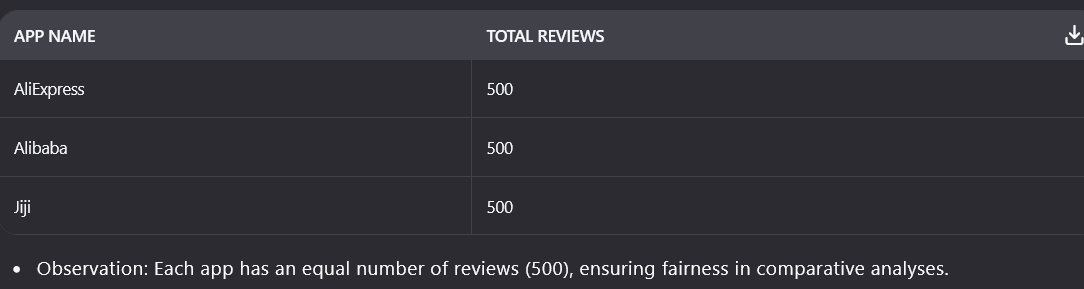
2. Monthly Review Count Trend per App 

The line chart illustrating the monthly trend of review counts reveals distinct patterns: 

AliExpress: Exhibits a significant surge in reviews starting around mid-2024, peaking dramatically in late 2025. Prior to mid-2024, review activity appears minimal or non-existent in our dataset. 

Alibaba: Shows a more gradual accumulation of reviews over time, with a steady baseline and a notable, though less pronounced, increase leading into and through 2025. 

Jiji: Displays a relatively stable level of review activity over time, with a moderate increase in 2025, but significantly lower peak activity compared to AliExpress and Alibaba in the latter part of the year. 

Interpretation: The data strongly suggests that AliExpress experienced a major surge in user engagement or visibility around mid-to-late 2024, culminating in a peak in late 2025. This could be due to factors like a major marketing campaign, a significant app update, or expansion into a new market segment. In contrast, Alibaba shows a more established, steady growth trajectory, while Jiji maintains a lower but consistent level of user feedback. 
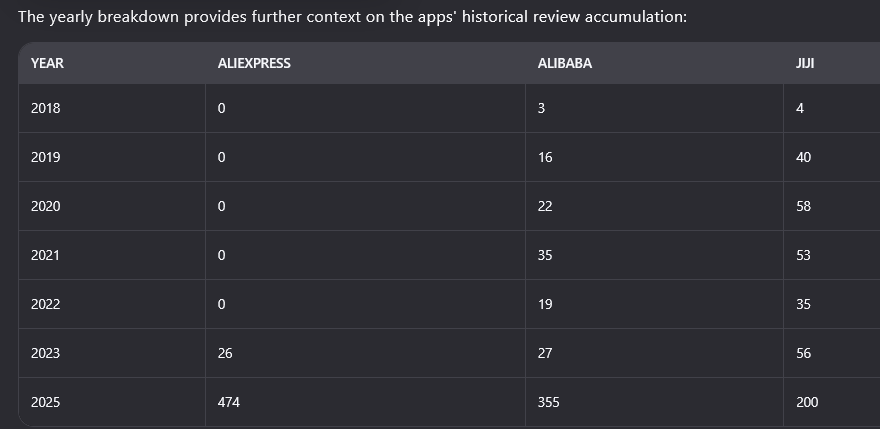
        
         
AliExpress: The absence of reviews from 2018 to early 2023 strongly indicates that AliExpress either had very limited presence/visibility in this market or underwent a significant relaunch/change around 2023. Its rapid accumulation of 474 reviews in (the available part of) 2025 highlights its explosive recent growth in terms of user feedback. 

Alibaba: Shows a consistent, albeit modest, presence from 2018 onwards, with fluctuating but generally increasing review counts up to 2023 (27 reviews). The 355 reviews in 2025 (partial year) reflect continued activity. 

Jiji: Appears to have a stronger historical presence compared to AliExpress in the earlier years (2019-2023), consistently gathering a moderate number of reviews. However, its performance in 2025 (200 reviews in a partial year) lags behind both AliExpress and Alibaba. 

Interpretation: The yearly data reinforces the notion that AliExpress is a relative newcomer or has undergone a major transformation recently, leading to its rapid rise in user engagement as seen in 2025. Jiji seems to have an established user base with consistent, moderate feedback historically, but its growth in user engagement (as measured by review volume) in 2025 is the least among the three. Alibaba represents a middle ground, showing steady historical growth and a significant, though not as explosive as AliExpress, increase in 2025. 
     

 
Key Takeaways from Review Count Analysis 
Balanced Dataset: Equal sample sizes (500 reviews) allow for fair comparisons.
AliExpress's Rapid Rise: AliExpress shows a very recent and dramatic increase in user engagement, suggesting a significant event or change around    mid-2024.
Established Players: Alibaba and Jiji have longer historical review footprints, indicating more established user bases. Jiji, while consistent, shows the least growth in 2025.
Temporal Focus: The significant spike in reviews across all apps in late 2025 warrants further investigation in subsequent analyses (e.g., sentiment during this period).
     


# Analysis 2: Rating Distribution Analysis 

The star rating provided by a user is a direct and quantifiable measure of their satisfaction with an app. Analyzing the distribution of these ratings is crucial for understanding the overall user sentiment and identifying potential strengths or weaknesses. 

In this section, we will perform two key analyses on the Rating data: 

    Overall Rating Distribution: We will visualize the frequency of each star rating (1 to 5) for each of the three apps (AliExpress, Alibaba, Jiji) using a count plot. This allows us to see: 
        The general sentiment balance (e.g., are ratings skewed towards positive or negative?).
        The proportion of each rating level within an app.
        Direct comparison of rating distributions between the apps. Are users of one app consistently happier (giving more 5s) or more dissatisfied (giving more 1s or 2s) compared to others?
         

    Average Rating Comparison: We will calculate the mean (average) star rating for each app. This provides a single numerical summary of overall user satisfaction for each platform. We will also compare each app's average to the overall average rating across all apps. Visualizing these averages will make it easy to rank the apps based on this key metric. 
     


--- Rating Distribution Analysis ---


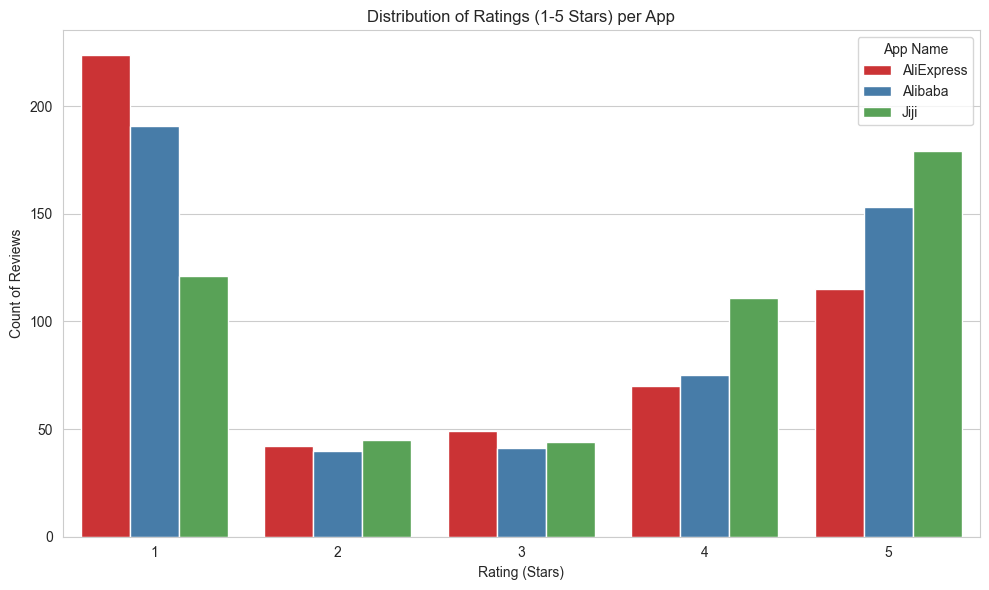


Average Rating per App:
AppName
Jiji          3.364
Alibaba       2.918
AliExpress    2.620
Name: Rating, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_18796\1507971817.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




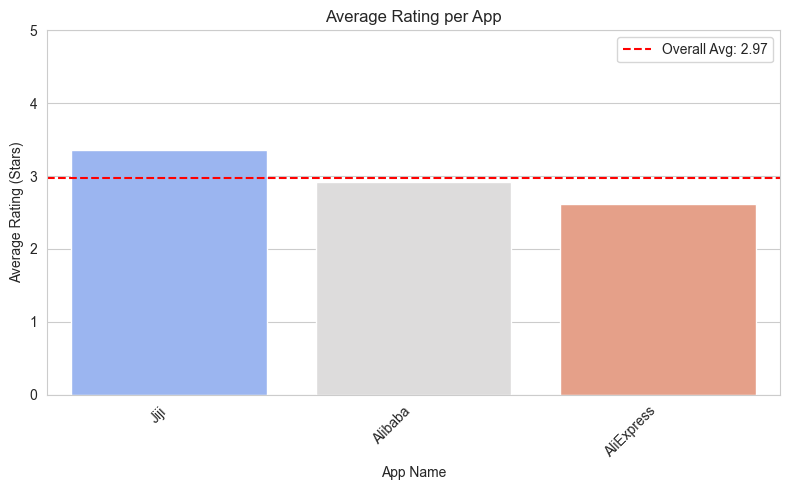

In [6]:
# Cell 4: Rating Distribution Analysis
print("\n--- Rating Distribution Analysis ---")

# 1. Overall Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rating', hue='AppName', palette='Set1')
plt.title('Distribution of Ratings (1-5 Stars) per App')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count of Reviews')
plt.legend(title='App Name')
plt.tight_layout()
plt.show()

# 2. Average Rating per App
avg_ratings = df.groupby('AppName')['Rating'].mean().sort_values(ascending=False)
print("\nAverage Rating per App:")
print(avg_ratings)

# Bar chart for average rating
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='coolwarm')
plt.title('Average Rating per App')
plt.xlabel('App Name')
plt.ylabel('Average Rating (Stars)')
plt.ylim(0, 5) # Ratings are between 1 and 5
plt.axhline(y=df['Rating'].mean(), color='red', linestyle='--', label=f'Overall Avg: {df["Rating"].mean():.2f}')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation of Rating Distribution Analysis 
1. Overall Rating Distribution (Histograms per App) 

The first chart shows the distribution of ratings (1-5 stars) for each app: AliExpress, Alibaba, and Jiji. Here’s what we observe: 

    AliExpress: 
        Rating 1: A significant number of reviews are rated as 1-star, indicating a high proportion of very dissatisfied users.
        Rating 5: There is also a notable peak at 5 stars, suggesting that some users are extremely satisfied with AliExpress.
        Middle Ratings (2-4): Fewer reviews fall in the middle range, which suggests polarized opinions among users.
         

    Alibaba: 
        Rating 1: Similar to AliExpress, there is a substantial number of 1-star reviews, indicating dissatisfaction.
        Rating 5: Alibaba has fewer 5-star reviews compared to AliExpress, suggesting slightly less extreme positive feedback.
        Middle Ratings (2-4): Like AliExpress, Alibaba also shows fewer reviews in the middle range, reinforcing the idea of polarized user sentiment.
         

    Jiji: 
        Rating 1: Jiji has the lowest number of 1-star reviews among the three apps, indicating relatively fewer extremely dissatisfied users.
        Rating 5: Jiji has the highest number of 5-star reviews, suggesting a higher proportion of extremely satisfied users compared to the other two apps.
        Middle Ratings (2-4): Jiji shows a more balanced distribution across the middle ratings (2-4), indicating a broader range of user experiences.
         
     

Key Observations: 

    Polarization: Both AliExpress and Alibaba exhibit highly polarized rating distributions, with significant peaks at both ends (1-star and 5-star). This suggests that users either love or hate these apps.
    Balanced Feedback: Jiji shows a more balanced distribution, with fewer extreme ratings and more reviews falling in the middle range (2-4 stars).
     

2. Average Rating per App 

The second chart displays the average rating for each app, along with an overall average rating across all apps (2.97): 

    Jiji: Average rating = 3.364 (highest among the three apps).
    Alibaba: Average rating = 2.918 (close to the overall average).
    AliExpress: Average rating = 2.620 (lowest among the three apps).
     

Insights (Refined): 

    Jiji Leads: Jiji has the highest average rating (3.364), indicating it generally receives the best feedback from users compared to AliExpress and Alibaba.
    Alibaba in the Middle: Alibaba's average rating (2.918) places it between Jiji and AliExpress, roughly aligning with the overall average.
    AliExpress Trails: AliExpress has the lowest average rating (2.620). However, as noted, this lower score must be considered in the context of its recent entry into the market (scraped data shows minimal activity before 2023, with a major surge starting in 2024).
     

Considering App Age: 

    Established Apps (Alibaba, Jiji): Having been available longer, these apps have likely had more time to refine their offerings, address major initial issues, and build a more stable (though perhaps polarized, as seen in the distribution) user base. Their average ratings reflect a longer-term accumulation of user experiences, including both early struggles and later improvements.
    New Entrant (AliExpress - in this dataset): The data strongly suggests AliExpress has a much shorter history within the scope of this dataset. The influx of reviews starting significantly in 2024 and peaking in 2025 coincides with its lower average rating. This could imply several things:
        Growing Pains: As a newer or recently re-promoted player, AliExpress might be experiencing "growing pains." Early users during this resurgence phase might encounter bugs, new logistical challenges, or unmet expectations related to the initial rollout or relaunch efforts.
        Critical Early Adopters: The users trying the app during its rapid growth phase might be more critical or vocal about initial shortcomings, leading to a higher proportion of lower ratings early on.
        Different User Base/Market Entry: AliExpress might be targeting a different segment or entering a market where user expectations or competition dynamics are particularly challenging, resulting in lower initial satisfaction scores compared to the established players in this dataset.
         
     

Conclusion on Rating: 

While AliExpress undeniably has the lowest average rating, attributing this solely to inferior quality might be premature. Its status as a recent entrant or relaunch in this market (based on review volume trends) is a crucial factor. Its lower average rating likely reflects the challenges and initial user experiences associated with this recent phase of market entry, rather than a long-term assessment of its overall quality compared to more established apps like Alibaba and Jiji. As it matures and addresses early feedback, its average rating could potentially evolve. 

 
Key Takeaways from Rating Distribution Analysis 

    User Sentiment Polarization: 
        AliExpress and Alibaba: Both apps show highly polarized user sentiment, with significant numbers of both 1-star and 5-star reviews. This indicates that users have strong opinions about these apps, either extremely positive or extremely negative.
        Jiji: In contrast, Jiji exhibits a more balanced distribution of ratings, suggesting a wider range of user experiences and fewer extremes.
         

    Relative Performance: 
        Jiji Leads: Jiji has the highest average rating (3.364), indicating it performs best among the three apps in terms of overall user satisfaction.
        AliExpress Trails: AliExpress has the lowest average rating (2.620), suggesting it faces more criticism from users compared to the other two apps.
        Alibaba in Between: Alibaba's average rating (2.918) places it in the middle, slightly below the overall average but closer to Jiji than AliExpress.
         

    Potential Areas for Improvement: 
        AliExpress and Alibaba: Given their polarization, both apps might benefit from addressing specific pain points that drive 1-star reviews while maintaining features that attract 5-star reviews.
        Jiji: While Jiji performs well overall, understanding the reasons behind its lower 1-star reviews could help further improve user satisfaction.
         
     

# Analysis 3: Review Length Analysis 

The length of a user review can often provide indirect insights into the depth of the user's experience, their level of engagement, or the intensity of their feelings (either positive or negative). Analyzing review length helps us understand not just what users are saying, but also how much they are saying and under what circumstances. 

In this section, we will examine the ReviewWordCount feature (calculated during data cleaning) to understand the distribution and characteristics of review lengths across the three apps and in relation to star ratings. 

We will perform the following analyses: 

    Distribution of Review Lengths (Word Count): We will plot histograms (with Kernel Density Estimation curves) to visualize the distribution of the number of words in reviews for each app separately. This will help us answer: 
        What is the typical length of a review for each app?
        Are the distributions similar or different (e.g., does one app tend to have consistently longer or shorter reviews)?
        Are the distributions skewed (e.g., mostly short reviews with a few very long ones)?
         

    Review Length by Rating: We will use boxplots to compare the distribution of review word counts across different star ratings (1 to 5) for each app. This aims to uncover potential relationships such as: 
        Do users tend to write longer reviews when they are extremely satisfied (5 stars) or extremely dissatisfied (1 star)?
        Is there a general trend where higher or lower ratings correlate with longer reviews?
        Do these patterns differ between the apps?
         

    Summary Statistics: We will generate descriptive statistics (mean, median, standard deviation, min, max, quartiles) for ReviewWordCount grouped by AppName. This provides numerical summaries to complement the visualizations. 
     


--- Review Length Analysis ---


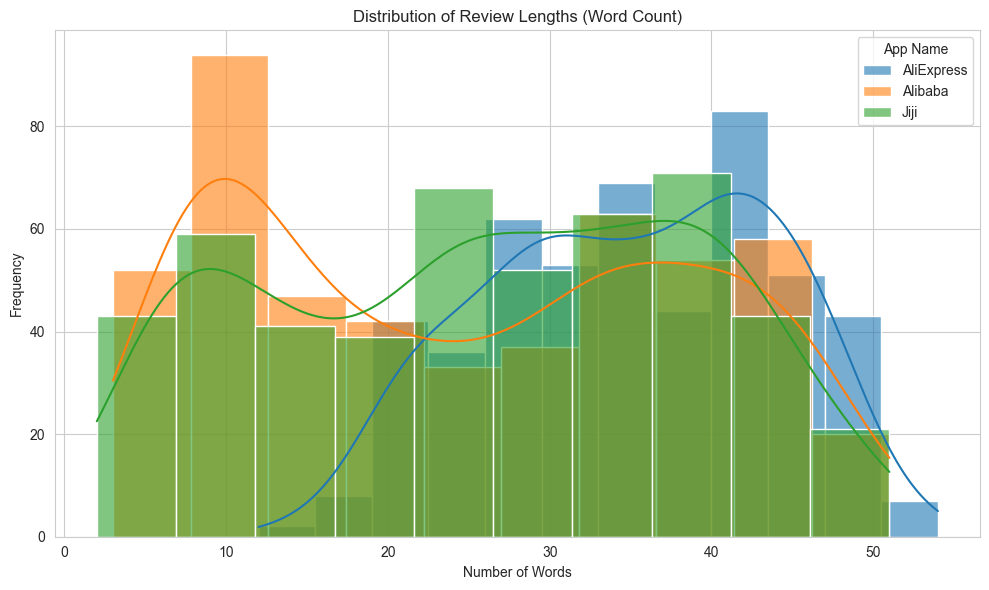

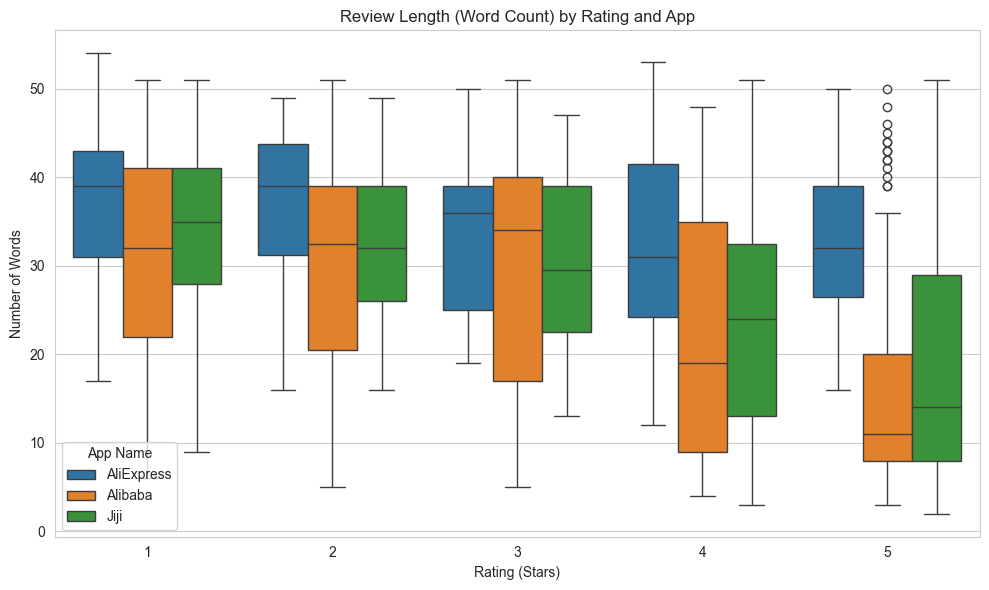


Review Length Summary Statistics:
            count    mean        std   min   25%   50%   75%   max
AppName                                                           
AliExpress  500.0  34.958   8.884487  12.0  28.0  36.0  42.0  54.0
Alibaba     500.0  24.934  13.905408   3.0  11.0  25.0  37.0  51.0
Jiji        500.0  25.962  13.073116   2.0  14.0  26.5  37.0  51.0


In [18]:
# Cell 5: Review Length Analysis
print("\n--- Review Length Analysis ---")

# Ensure ReviewWordCount exists (it was created in Phase 3)
# If not, uncomment the next line:
#df['ReviewWordCount'] = df['CleanedReviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# 1. Distribution of Review Lengths (Word Count)
plt.figure(figsize=(10, 6))
for app in df['AppName'].unique():
    subset = df[df['AppName'] == app]
    sns.histplot(subset['ReviewWordCount'], kde=True, label=app, alpha=0.6)
plt.title('Distribution of Review Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(title='App Name')
plt.tight_layout()
plt.show()

# 2. Review Length by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating', y='ReviewWordCount', hue='AppName')
plt.title('Review Length (Word Count) by Rating and App')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Words')
plt.legend(title='App Name')
plt.tight_layout()
plt.show()

# 3. Summary Statistics
print("\nReview Length Summary Statistics:")
print(df.groupby('AppName')['ReviewWordCount'].describe())

# Interpretation of Review Length Analysis 
1. Distribution of Review Lengths (Word Count) 

The first chart shows the distribution of review lengths (word count) for each app: 

    Observations: 
        AliExpress: The orange curve peaks around 10 words, indicating that many AliExpress reviews are relatively short.
        Alibaba: The blue curve is more spread out, with a peak around 30–40 words. This suggests that Alibaba reviews tend to be longer on average compared to AliExpress.
        Jiji: The green curve also peaks around 30–40 words, similar to Alibaba. However, it has a slightly wider spread, indicating some variability in review lengths.
         

    Insights: 
        AliExpress Reviews Are Shorter: Users of AliExpress tend to write shorter reviews, possibly because they prefer quick feedback or have less to say overall.
        Alibaba and Jiji Have Longer Reviews: Both Alibaba and Jiji have more substantial reviews, suggesting users might be providing more detailed feedback or discussing specific issues/experiences in greater depth.
        General Trend: Most reviews across all apps cluster between 10–50 words, which is typical for user-generated content on platforms like Google Play Store.
         
     

2. Review Length by Rating (Boxplots) 

The second chart shows how review length varies by star rating for each app: 

    Observations: 
        All Apps: Across all ratings (1–5 stars), there is a general trend where higher-rated reviews tend to be shorter compared to lower-rated reviews. For example:
            1-Star Reviews: Tend to have higher median word counts (longer reviews).
            5-Star Reviews: Tend to have lower median word counts (shorter reviews).
             
        App-Specific Insights:
            AliExpress: The boxplot shows consistent variability in review lengths across all ratings, but the trend of longer 1-star reviews is clear.
            Alibaba: Similar to AliExpress, with longer reviews for 1-star ratings and shorter reviews for 5-star ratings.
            Jiji: Shows a similar pattern, though the differences between ratings appear less pronounced compared to the other two apps.
             
         

    Insights: 
        Negative Feedback Is More Detailed: Users who give 1-star reviews often provide more detailed explanations of their dissatisfaction, resulting in longer reviews.
        Positive Feedback Is Concise: Users who give 5-star reviews tend to express satisfaction with fewer words, possibly because they are highlighting a single positive aspect rather than elaborating extensively.
        Consistency Across Apps: The trend of longer negative reviews and shorter positive reviews is consistent across all three apps, reinforcing the idea that dissatisfaction prompts more elaborate feedback.
         
     

3. Summary Statistics
   
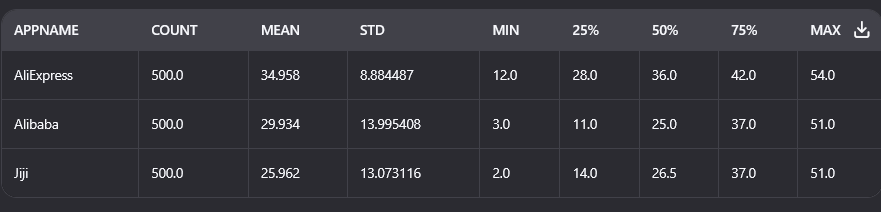
    Key Observations: 
        AliExpress: Has the highest average review length (mean = 34.958 words) among the three apps.
        Alibaba: Follows closely with an average review length of 29.934 words.
        Jiji: Has the shortest average review length (25.962 words).
         

    Insights: 
        AliExpress Users Write Longer Reviews Overall: Despite having shorter reviews for high ratings, AliExpress users generally write longer reviews compared to the other two apps.
        Alibaba and Jiji Have Similar Patterns: Both have shorter average review lengths, with Alibaba slightly longer than Jiji.
         
     

 
Key Takeaways from Review Length Analysis 

    Overall Review Length Trends: 
        AliExpress: Users tend to write longer reviews overall, with a mix of short and long reviews depending on sentiment.
        Alibaba and Jiji: Users of these apps write shorter reviews on average, with Alibaba slightly longer than Jiji.
         

    Sentiment and Review Length Relationship: 
        Negative Reviews Are Longer: Users who give 1-star ratings tend to write longer reviews, likely detailing their dissatisfaction.
        Positive Reviews Are Shorter: Users who give 5-star ratings tend to write shorter reviews, possibly expressing simple satisfaction without elaboration.
         

    App-Specific Insights: 
        AliExpress: Despite being newer to the dataset, users write longer reviews overall, indicating potentially more detailed feedback.
        Alibaba: Consistent with established patterns, showing a balance between detailed complaints and concise praise.
        Jiji: Has the shortest reviews overall, suggesting users may prefer brief feedback or have less to discuss.
         
     

 


--- Common Words/N-grams Analysis ---

Analyzing AliExpress...


C:\Users\hp\AppData\Local\Temp\ipykernel_18796\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




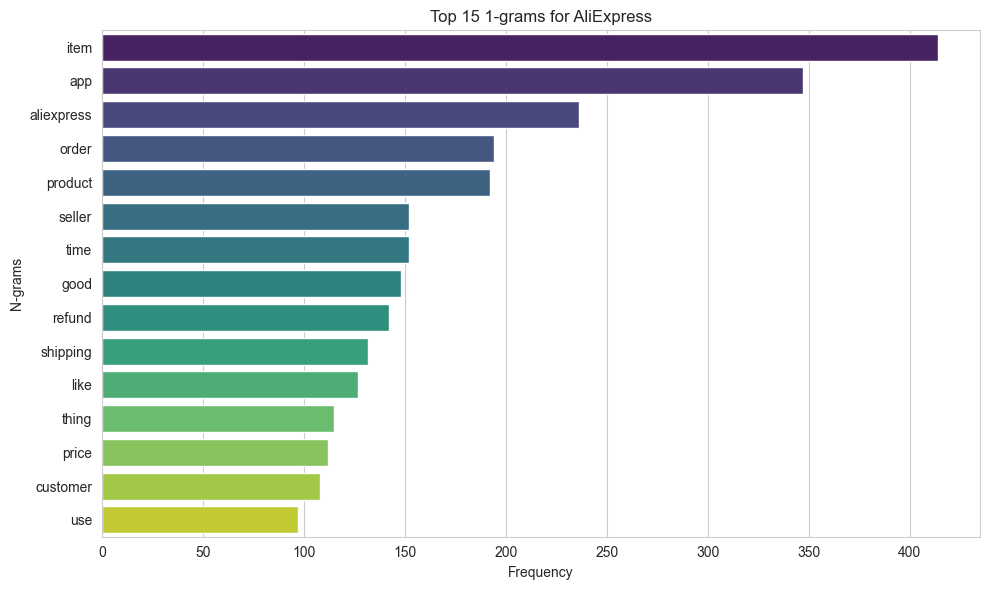

C:\Users\hp\AppData\Local\Temp\ipykernel_18796\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




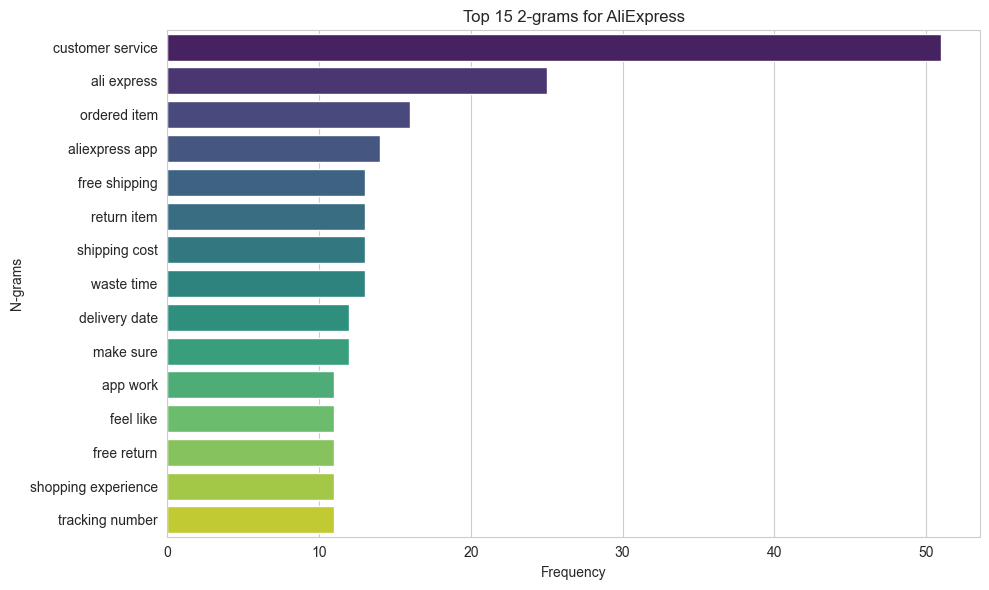


Analyzing Alibaba...


C:\Users\hp\AppData\Local\Temp\ipykernel_18796\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




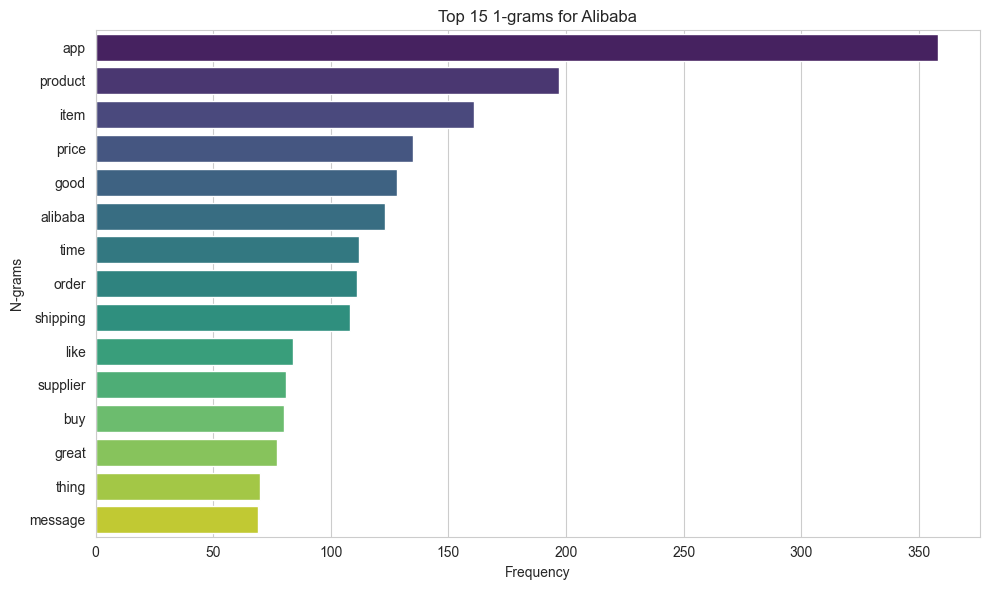

C:\Users\hp\AppData\Local\Temp\ipykernel_18796\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




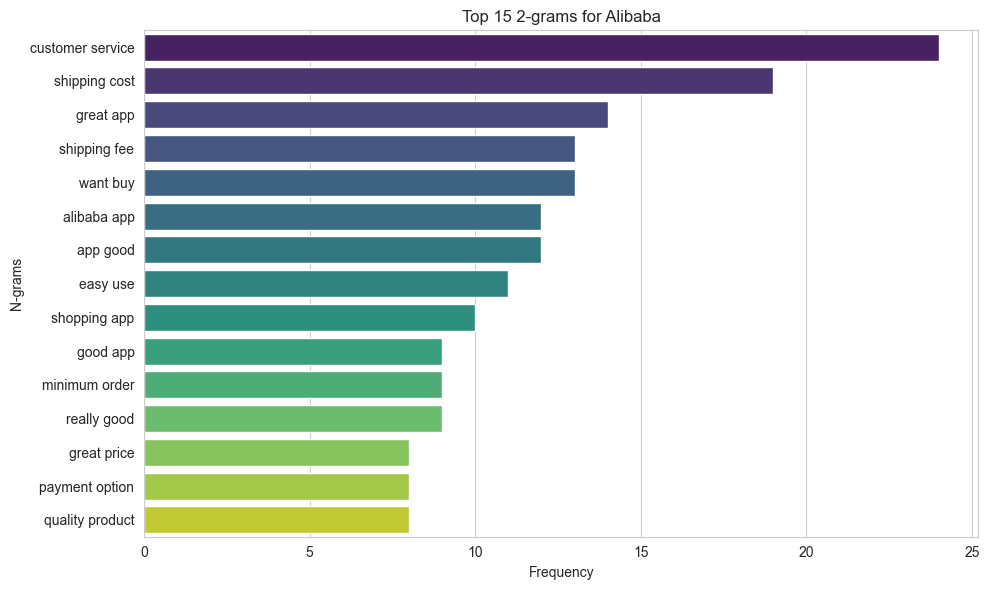


Analyzing Jiji...


C:\Users\hp\AppData\Local\Temp\ipykernel_18796\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




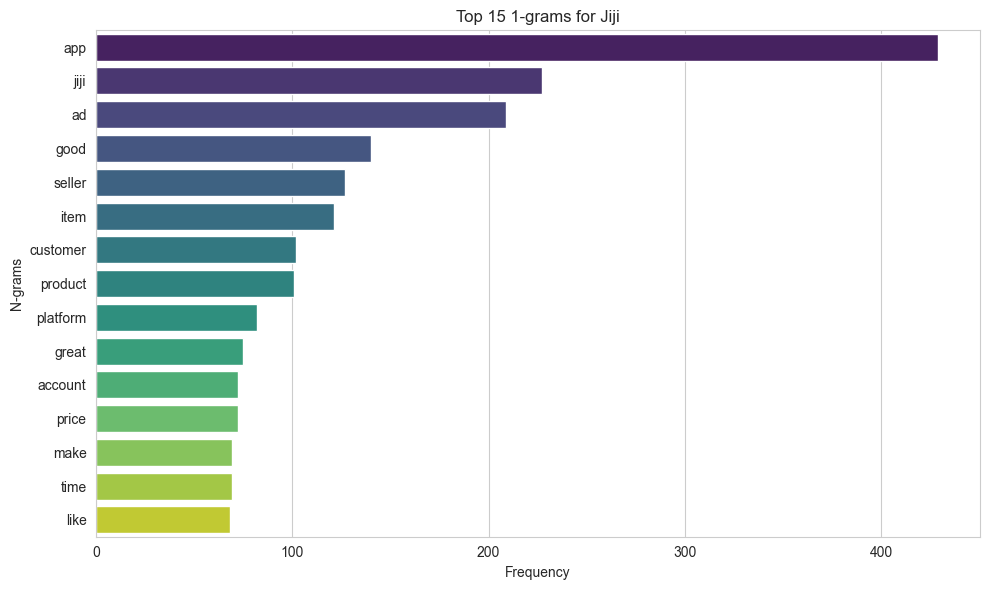

C:\Users\hp\AppData\Local\Temp\ipykernel_18796\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




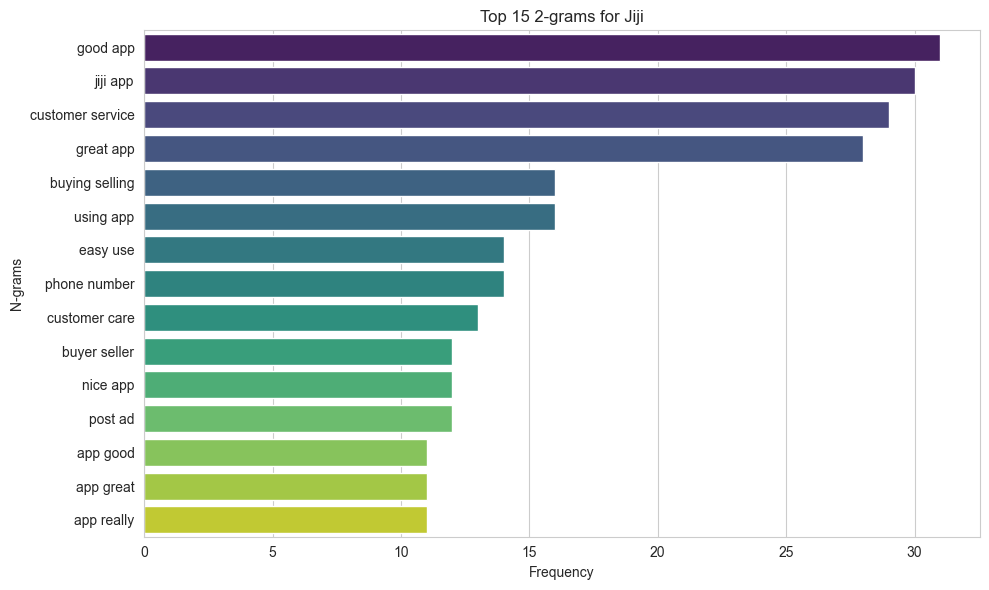


Generating Word Cloud for AliExpress...


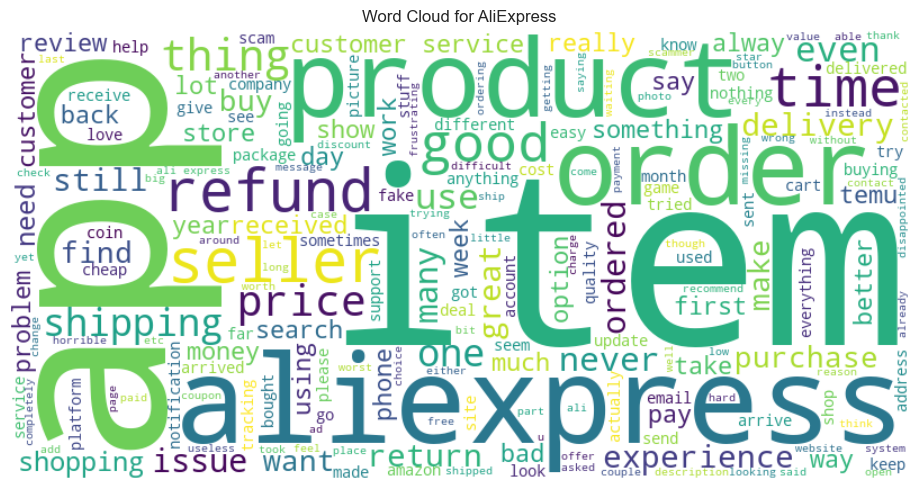


Generating Word Cloud for Alibaba...


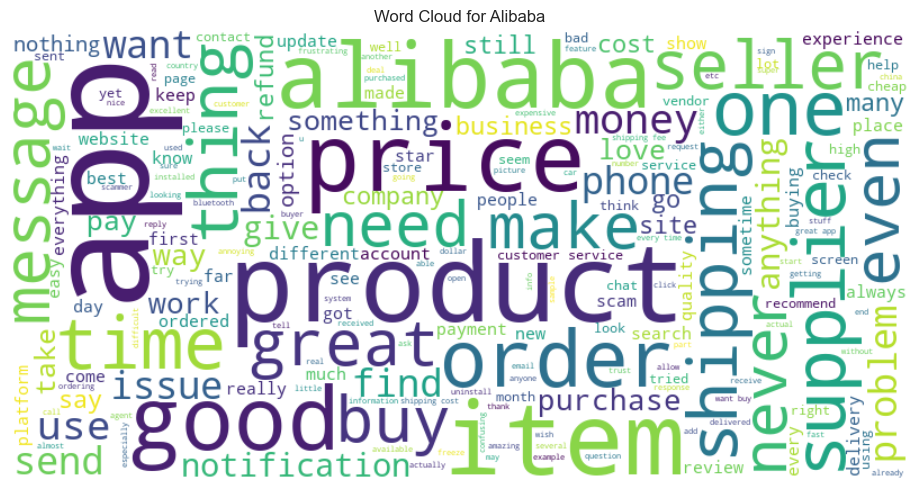


Generating Word Cloud for Jiji...


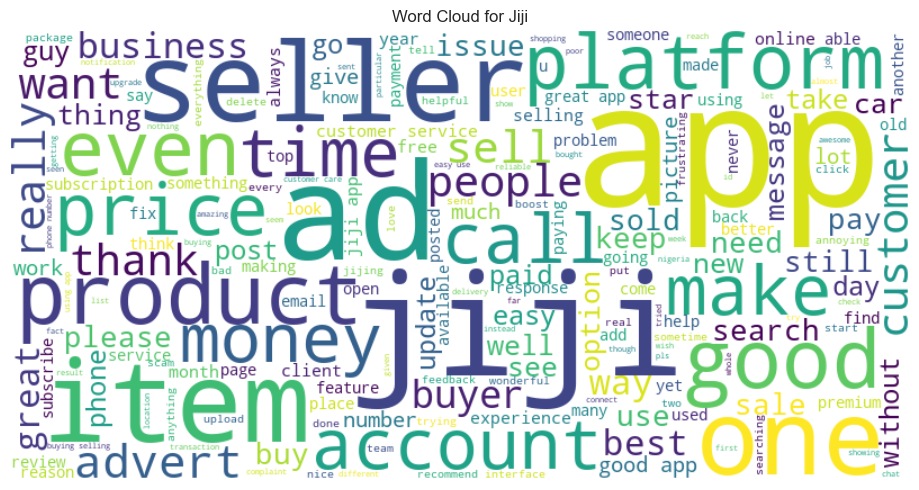

In [8]:
# Cell 6: Common Words/N-grams Analysis
print("\n--- Common Words/N-grams Analysis ---")

from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(app_name, ngram_range=(1, 1), top_n=20):
    """Helper function to plot top n-grams for a specific app."""
    app_df = df[df['AppName'] == app_name]
    # Use CountVectorizer for n-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=1000, stop_words='english')
    try:
        X = vectorizer.fit_transform(app_df['CleanedReviewText'].dropna()) # Drop NaNs
        # Sum counts for each feature (n-gram)
        sums = np.array(X.sum(axis=0)).flatten()
        ngram_counts = dict(zip(vectorizer.get_feature_names_out(), sums))
        # Get top N
        top_ngrams = Counter(ngram_counts).most_common(top_n)

        if top_ngrams:
            ngrams_list, counts_list = zip(*top_ngrams) # Unpack tuples
            plt.figure(figsize=(10, 6))
            sns.barplot(x=list(counts_list), y=list(ngrams_list), palette='viridis')
            plt.title(f'Top {top_n} {ngram_range[0]}-grams for {app_name}')
            plt.xlabel('Frequency')
            plt.ylabel('N-grams')
            plt.tight_layout()
            plt.show()
        else:
            print(f"No n-grams found for {app_name} with range {ngram_range}.")

    except ValueError as e:
        print(f"ValueError for {app_name} ngrams {ngram_range}: {e}") # E.g., empty vocabulary
    except Exception as e:
         print(f"An error occurred during n-gram analysis for {app_name}: {e}")


# Analyze for each app
for app in df['AppName'].unique():
    print(f"\nAnalyzing {app}...")
    # Unigrams (Single Words)
    plot_top_ngrams(app, ngram_range=(1, 1), top_n=15)
    # Bigrams (Two Words)
    plot_top_ngrams(app, ngram_range=(2, 2), top_n=15)
    # Trigrams (Three Words) - Optional, can be noisy
    # plot_top_ngrams(app, ngram_range=(3, 3), top_n=15)

# --- Optional: Word Clouds ---
def create_wordcloud(app_name):
    """Creates a word cloud for a specific app."""
    app_text = " ".join(df[df['AppName'] == app_name]['CleanedReviewText'].dropna().tolist())
    if not app_text.strip():
        print(f"No text available for word cloud for {app_name}.")
        return

    try:
        wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(app_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for {app_name}')
        plt.tight_layout()
        plt.show()
    except Exception as e:
         print(f"Error creating word cloud for {app_name}: {e}")

# Generate word clouds
for app in df['AppName'].unique():
    print(f"\nGenerating Word Cloud for {app}...")
    create_wordcloud(app)


--- Basic Sentiment Overview ---
Sentiment Distribution per App:
VADER_Sentiment  Negative  Neutral  Positive
AppName                                     
AliExpress            189       15       296
Alibaba               134       22       344
Jiji                   98       11       391


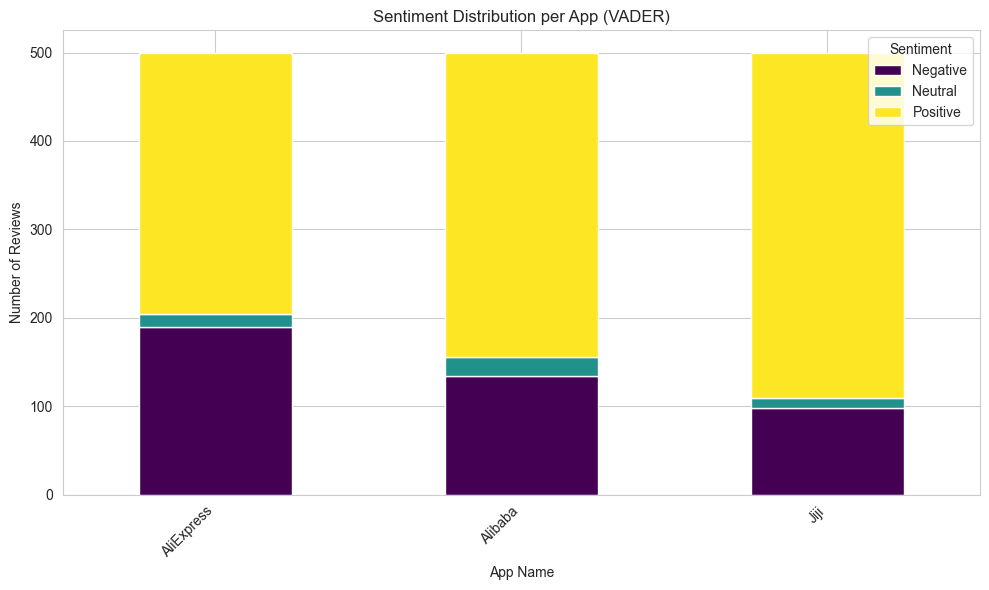


Average VADER Sentiment Score per App:
AppName
Jiji          0.434699
Alibaba       0.309090
AliExpress    0.196143
Name: VADER_Score, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_18796\3158387937.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




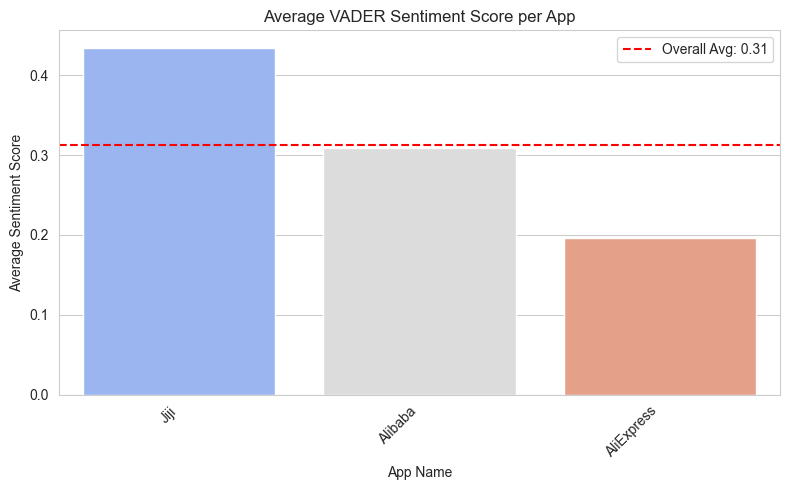

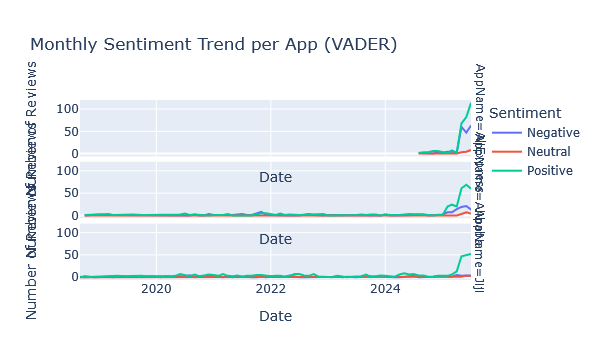

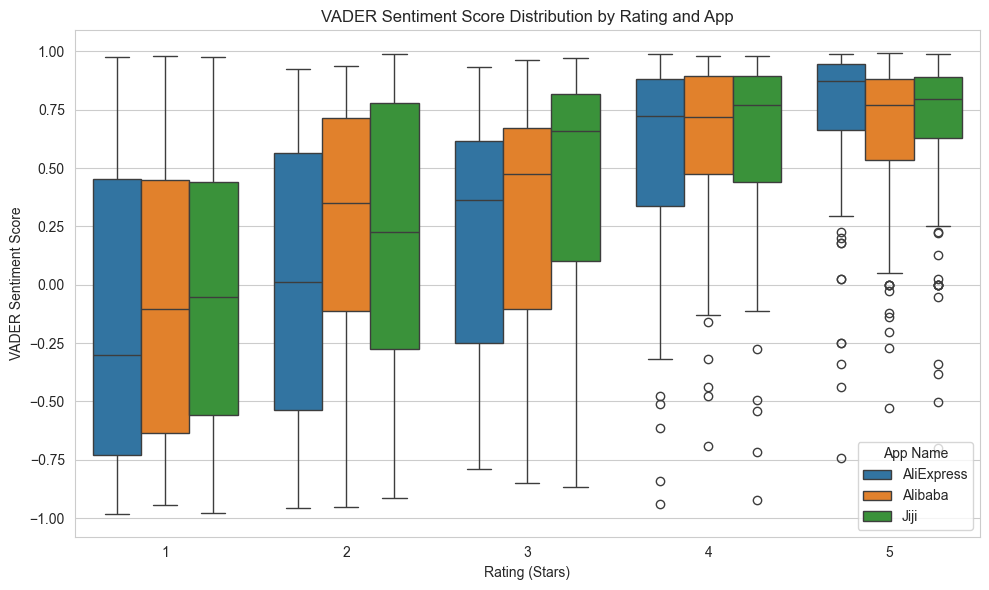


Correlation between Rating and VADER Sentiment Score:
               Rating  VADER_Score
Rating       1.000000     0.574705
VADER_Score  0.574705     1.000000


In [11]:
# Cell 7: Basic Sentiment Overview using VADER
print("\n--- Basic Sentiment Overview ---")

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get compound sentiment score
def get_vader_score(text):
    if not isinstance(text, str) or not text.strip():
        return 0 # Neutral score for missing/empty text
    scores = analyzer.polarity_scores(text)
    return scores['compound'] # Compound score is the overall sentiment (-1 to 1)

# Apply VADER to CleanedReviewText
df['VADER_Score'] = df['CleanedReviewText'].apply(get_vader_score)

# Classify sentiment based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Sentiment'] = df['VADER_Score'].apply(classify_sentiment)

# 1. Sentiment Distribution per App
sentiment_counts = df.groupby(['AppName', 'VADER_Sentiment']).size().unstack(fill_value=0)
print("Sentiment Distribution per App:")
print(sentiment_counts)

# Stacked Bar Chart
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution per App (VADER)')
plt.xlabel('App Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# 2. Average Sentiment Score per App
avg_sentiment = df.groupby('AppName')['VADER_Score'].mean().sort_values(ascending=False)
print("\nAverage VADER Sentiment Score per App:")
print(avg_sentiment)

# Bar chart for average sentiment
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values, palette='coolwarm')
plt.title('Average VADER Sentiment Score per App')
plt.xlabel('App Name')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=df['VADER_Score'].mean(), color='red', linestyle='--', label=f'Overall Avg: {df["VADER_Score"].mean():.2f}')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Sentiment Trend Over Time (Monthly)
# --- Ensure YearMonth is calculated correctly ---
# Make sure ReviewDate is datetime (should be from loading)
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])
# Extract Year-Month for grouping (as Period)
df['YearMonth'] = df['ReviewDate'].dt.to_period('M')

# Group by App, YearMonth, and Sentiment
sentiment_trend = df.groupby(['AppName', 'YearMonth', 'VADER_Sentiment']).size().reset_index(name='Count')

# Pivot for easier plotting
pivot_trend = sentiment_trend.pivot_table(index=['AppName', 'YearMonth'], columns='VADER_Sentiment', values='Count', fill_value=0).reset_index()

# Melt for plotting with Plotly
melted_trend = pivot_trend.melt(id_vars=['AppName', 'YearMonth'], var_name='Sentiment', value_name='Count')

# --- FIX: Convert Period to Timestamp for Plotly compatibility ---
# The line below is the crucial fix
melted_trend['YearMonth'] = melted_trend['YearMonth'].dt.to_timestamp()
# --- END OF FIX ---

fig = px.line(melted_trend, x='YearMonth', y='Count', color='Sentiment', facet_row='AppName',
              title='Monthly Sentiment Trend per App (VADER)',
              labels={'YearMonth':'Date', 'Count':'Number of Reviews'})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Reviews')
fig.show() # This should now work

# 4. Sentiment vs. Rating Correlation
# Box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating', y='VADER_Score', hue='AppName')
plt.title('VADER Sentiment Score Distribution by Rating and App')
plt.xlabel('Rating (Stars)')
plt.ylabel('VADER Sentiment Score')
plt.legend(title='App Name')
plt.tight_layout()
plt.show()

# Correlation coefficient
print("\nCorrelation between Rating and VADER Sentiment Score:")
print(df[['Rating', 'VADER_Score']].corr())


--- Missing Value Analysis ---
Columns with Missing Values:
              Count  Percentage
ReplyContent    828   55.200000
RepliedAt       828   55.200000
AppVersion      127    8.466667


C:\Users\hp\AppData\Local\Temp\ipykernel_18796\4089422975.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




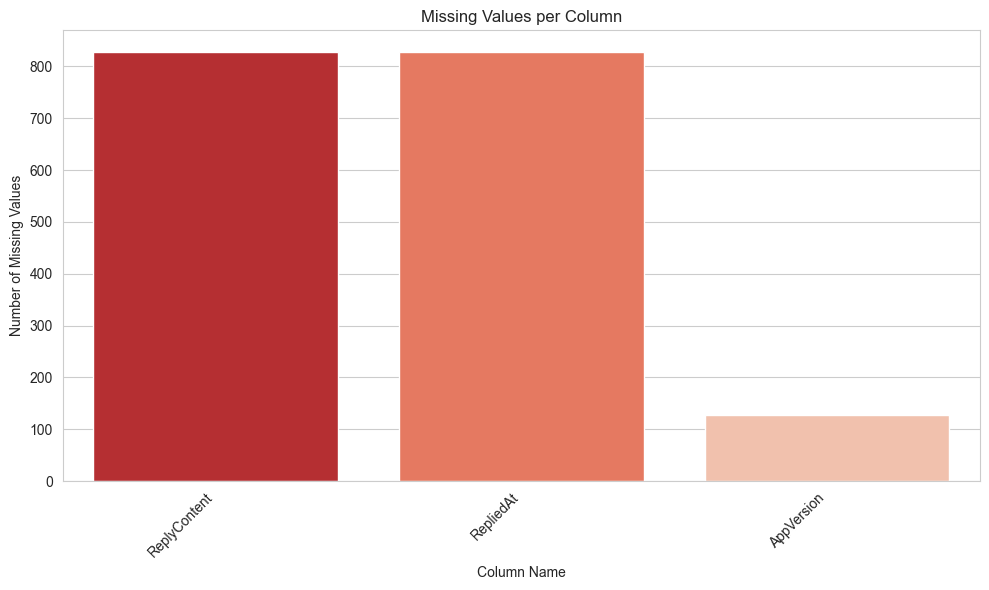


Checking specific columns:
Reviews with Developer Reply: 672
Reviews with App Version: 1373


In [10]:
# Cell 8: Missing Value Analysis
print("\n--- Missing Value Analysis ---")

# Check for missing values in the cleaned dataset
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Count': missing_values, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Count'] > 0].sort_values(by='Count', ascending=False)

if not missing_df.empty:
    print("Columns with Missing Values:")
    print(missing_df)

    # Bar chart of missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y=missing_df['Count'], palette='Reds_r')
    plt.title('Missing Values per Column')
    plt.xlabel('Column Name')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the cleaned dataset.")

# Optional: Check for specific patterns (e.g., missing ReplyContent is common)
print("\nChecking specific columns:")
print(f"Reviews with Developer Reply: {df['ReplyContent'].notnull().sum()}")
print(f"Reviews with App Version: {df['AppVersion'].notnull().sum()}")